# Recursion

## Summing up numbers

### Iterative Version

In [1]:
def list_sum(num_list):
    the_sum = 0
    for i in num_list:
        the_sum += i
        
    return the_sum

In [2]:
list_sum([1,3,5,7,9])

25

### Importing `rcviz`

`pip3 install git+https://github.com/DamnedFacts/rcviz.git`

In [3]:
from rcviz import viz, CallGraph

### Recursive Version

In [4]:
cg = CallGraph()

In [5]:
@viz(cg)
def list_sum_rec(num_list):
    if len(num_list) == 1:
        # base case
        return num_list[0]
    else:
        # recursive statement
        # Two or more numbers in our num_list
        return num_list[0] + list_sum_rec(num_list[1:])

In [6]:
list_sum_rec([1,3,5,7,9])

25

callviz: Rendering in inline in Jupyter Notebook


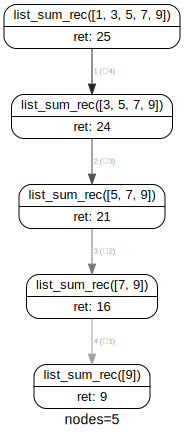

In [7]:
cg

### Recursive Version (Better)

In [8]:
cg = CallGraph()

In [9]:
@viz(cg)
def list_sum_rec2(the_sum, num_list):
    if len(num_list) == 0:
        return the_sum
    
    return list_sum_rec2(the_sum + num_list[0], num_list[1:])

In [10]:
list_sum_rec2(0, [1,3,5,7,9])

25

callviz: Rendering in inline in Jupyter Notebook


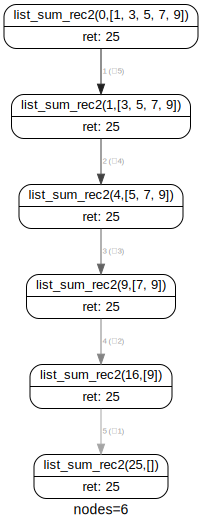

In [11]:
cg

### Recursive Version (Slighty better over the last one)

In [ ]:
# `rcviz` has bugs, it won't work if you have indirect recursion

In [ ]:
def helper(the_sum, num_list):
    if len(num_list) == 0:
        return the_sum
    
    return helper(the_sum + num_list[0], num_list[1:])

In [ ]:
def list_sum_rec3(num_list):
    return helper(0, num_list)

In [ ]:
list_sum_rec3([1,3,5,7,9])

## Factorial

### Iterative

In [12]:
def fact(n):
    result = 1
    
    for i in range(2, n+1):
        result *= i
        
    return result

In [13]:
fact(6)

720

In [15]:
fact(1000)

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

### Recursive

In [19]:
#cg = CallGraph()
#@viz(cg)

def fact_rec(n):
    if n == 0:
        return 1
    else:
        return n*fact_rec(n-1)

In [28]:
fact_rec(900)

6752680220964584158387906136180081422426942786958938431219826870368509164318041696913244695269830379422601037057867290859319834769988692859190650103158765184697675968111260952478709384800442863618689339527278445063035408024321764665802469665906595179375722352022923557754865383368110217097389374605464912641590914315017286072115668581065575923001145013299217645498322753869634011261044702900233700488787726638770458607729358543315161251880014776446118268082286709278669498283183864180099749981933920657941532564974848626523391891108711459244089659406267591429492581671986217837467927209263752478693903629003592427178225373805988693392344787776958300301670536333903141306915583751852476107834205263547563211316961877454927570148010693336299000373258937059355732529943473445929586672898874079417465439147992600084884668670872973671320728520371273220127241083083691305263536508288872517163608158715160346829110675464039823214667362737089593409077782882754955423243619046482799868392717924602991944325102

In [21]:
cg

callviz: Rendering in inline in Jupyter Notebook


### Python is not optimized for recursion and has a limited recursion depth (~1000 usually)

In [ ]:
fact_rec(100)

In [29]:
# Global scope!
import sys
sys.getrecursionlimit()

1000

## Fibonacci Sequence

### Iterative Version

In [30]:
def fib(n):
    a = 0
    b = 1
    i = 0
    
    while i < n:
        t = a + b
        a = b
        b = t
        i += 1
        print(a)
        
    return a

In [37]:
fib(10)

1
1
2
3
5
8
13
21
34
55


55

### Recursive Fibonacci (naive approach)
Asymptoic time complexity is on the order of $O(2^n)$

In [38]:
cg = CallGraph()
@viz(cg)

def fib_rec_1(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_rec_1(n-1) + fib_rec_1(n-2)

In [40]:
fib_rec_1(10)

55

In [ ]:
cg

### Recursive Fibonacci (better approach)
Asymptoic time complexity is on the order of $O(n)$

In [41]:
def fib_rec_2(n):
    # Nonlocal scope!
    
    def helper(a, b, i):
        # Local scope!
        if i == n:
            return b
        print(b)
        return helper(b, a+b, i+1)
    
    return helper(1, 0, 0)

In [43]:
fib_rec_2(5)

0
1
1
2
3


5

## Int to string

In [55]:
import string
cg = CallGraph()

@viz(cg)
def to_str(n, base):
    """Convert from any base from 2 to 16"""
    
    #convert_string = "0123456789ABCDEF"  # digits for hexadecimal values
    convert_string = string.digits + string.ascii_uppercase[0:6]
    
    if n < base:
        return convert_string[n]
    else:
        return to_str(n//base, base) + convert_string[n%base]

In [57]:
to_str(15, 16)

'F'

callviz: Rendering in inline in Jupyter Notebook


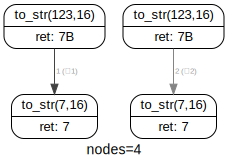

In [49]:
cg

## String permutations

In [58]:
cg = CallGraph()
@viz(cg)
def permutations(s, prefix=""):
    n = len(s)
    if n == 0:
        print(prefix)
    else:
        for i in range(n):
            permutations(s[0:i] + s[i+1:n], prefix + s[i])

In [62]:
permutations("abc")

abc
acb
bac
bca
cab
cba


In [ ]:
cg

## Hanoi Tower

In [68]:
def move_tower(height, from_pole, to_pole, with_pole):
    if height >= 1:
        move_tower(height - 1, from_pole, with_pole, to_pole)
        move_disk(from_pole, to_pole)
        move_tower(height - 1, with_pole, to_pole, from_pole)

def move_disk(fp,tp):
        print("moving disk from",fp,"to",tp)

move_tower(1, "A", "C", "B")

moving disk from A to C


# The iterative version is less intuitive

In [69]:
def hanoi_iter(height, fromPole, toPole, withPole):
        if height % 2 == 0:
            poles = [fromPole, withPole, toPole]
        else:
            poles = [fromPole, toPole, withPole]
        stacks = [range(height, 0, -1), [height], [height]]
        for i in range(2**height-1):
            if i % 2 == 0:  # move little disk
                fd = (i//2)%3
                td = (i//2+1)%3
            else:           # move other disk
                fd = (i//2)%3
                td = (i//2+2)%3
                if (stacks[fd][len(stacks[fd])-1] > 
                    stacks[td][len(stacks[td])-1]):
                    td = (i//2)%3
                    fd = (i//2+2)%3
                stacks[td].append(list(stacks[fd]).pop())
            move_disk(poles[fd], poles[td])

In [70]:
hanoi_iter(3, "A", "C", "B")

moving disk from A to C
moving disk from A to B
moving disk from C to B
moving disk from A to C
moving disk from B to A
moving disk from B to C
moving disk from A to C
